# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [118]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [119]:
# Verificando os tipos de dados de cada coluna
print(df.dtypes)

# Convertendo colunas categóricas para o tipo 'category'
cat_cols = [
    'Gender',
    'Education',
    'Marital Status',
    'Home Ownership',
    'Credit Score'
]

for col in cat_cols:
    df[col] = df[col].astype('category')

# Converter Income para numérico, já que não faz sentido mantê-lo como string
df['Income'] = (
    df['Income']
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)



Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [120]:
# Verificando dados nulos
print(df.isnull().sum())
df['Age'] = df.groupby('Marital Status')['Age']\
              .transform(lambda x: x.fillna(x.median()))

# Após alguns testes, voltei nessa parte do codigo para modificar a coluna de age, já que estavam 'esturando' certas partes dos gráficos a seguir, por isso, decidi preencher as linhas nulas com a mediana da idade de acordo com o estado civil da pessoa, já que isso faz mais sentido do que dropar as linhas, ou substituir pela mediana, como tinha feito anteriormente.

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64


C:\Users\davie\AppData\Local\Temp\ipykernel_12292\3004842756.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [121]:
for col in cat_cols:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("\n")

Coluna: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Coluna: Education
['Bachelor's Degree', 'Master's Degree', 'Doctorate', 'High School Diploma', 'Associate's Degree']
Categories (5, object): ['Associate's Degree', 'Bachelor's Degree', 'Doctorate', 'High School Diploma', 'Master's Degree']


Coluna: Marital Status
['Single', 'Married']
Categories (2, object): ['Married', 'Single']


Coluna: Home Ownership
['Rented', 'Owned']
Categories (2, object): ['Owned', 'Rented']


Coluna: Credit Score
['High', 'Average', 'Low']
Categories (3, object): ['Average', 'High', 'Low']




In [122]:
# Podemos verificar que as colunas 'Education' e 'Marital Status' possuem categorias que podem ser agrupadas. Por exemplo, 'High School' e 'High School Graduate' podem ser agrupados como 'High School', e 'Single' e 'Divorced' podem ser agrupados como 'Not Married'. Vamos fazer isso para simplificar a análise.
# Agrupando categorias de 'Education'
df['Education'] = df['Education'].replace({'High School Graduate': 'High School'})
# Agrupando categorias de 'Marital Status'
df['Marital Status'] = df['Marital Status'].replace({'Single': 'Not Married'})
# Verificando novamente as categorias únicas após o agrupamento
for col in cat_cols:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("\n")
    

Coluna: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


Coluna: Education
['Bachelor's Degree', 'Master's Degree', 'Doctorate', 'High School Diploma', 'Associate's Degree']
Categories (5, object): ['Associate's Degree', 'Bachelor's Degree', 'Doctorate', 'High School Diploma', 'Master's Degree']


Coluna: Marital Status
['Not Married', 'Married']
Categories (2, object): ['Married', 'Not Married']


Coluna: Home Ownership
['Rented', 'Owned']
Categories (2, object): ['Owned', 'Rented']


Coluna: Credit Score
['High', 'Average', 'Low']
Categories (3, object): ['Average', 'High', 'Low']




C:\Users\davie\AppData\Local\Temp\ipykernel_12292\447938098.py:5: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [123]:
df.describe()


,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.478659,83765.243902,0.652439
std,7.928041,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.375000,57500.000000,0.000000
50%,36.500000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


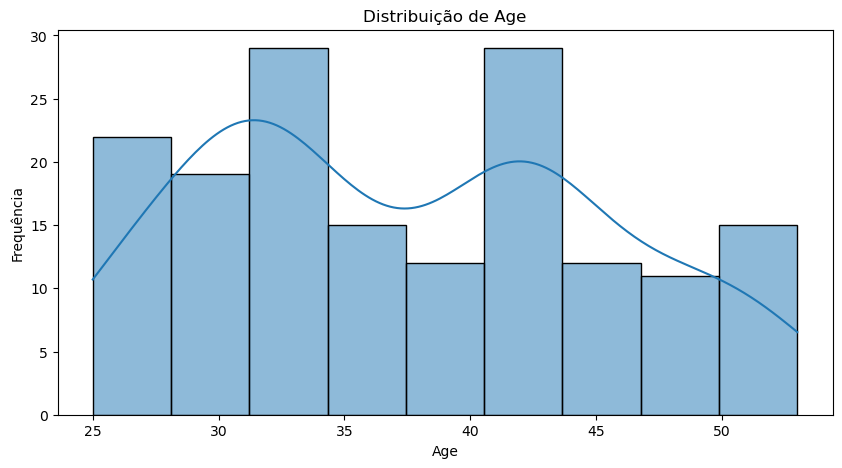

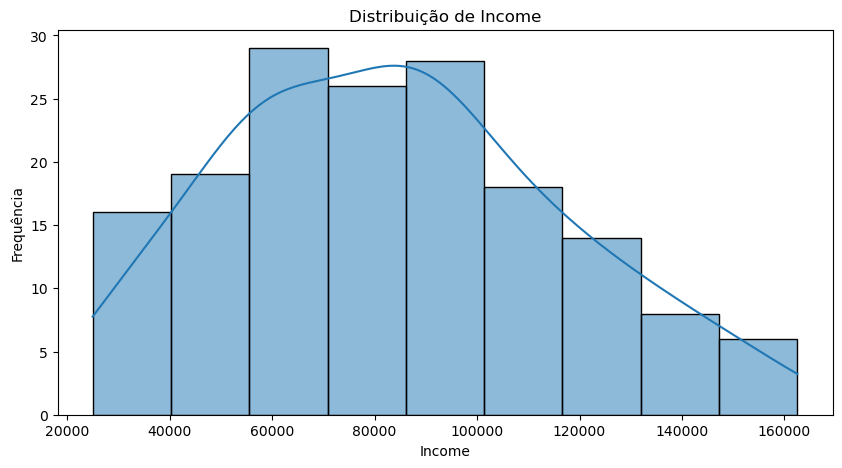

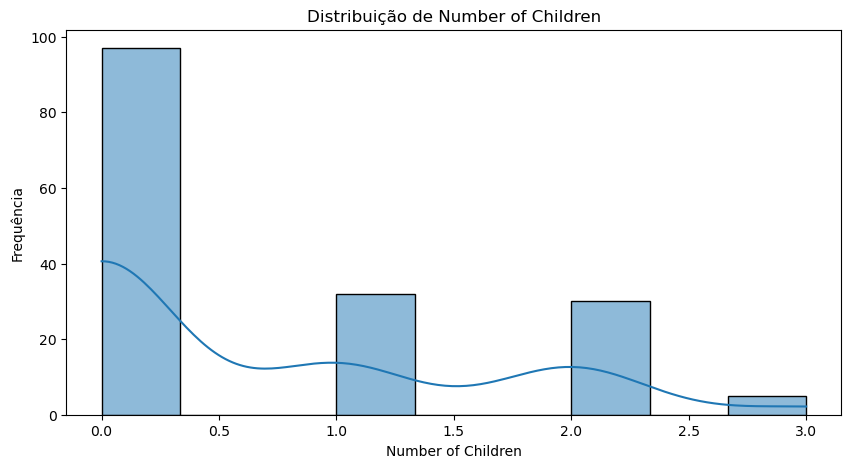

In [124]:
# Plotando gráficos para cada variavel numérica
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()



In [125]:
# No caso de number of children, podemos ver que a maioria dos clientes não tem filhos, e há uma pequena quantidade de clientes com 1 ou 2 filhos, veremos se há relação futuramente.
# A coluna income parece ter uma distriubuição assimétrica, entretanto, a maioria dos clientes tem uma renda entre 0 e 100.000, o que é esperado para um dataset de crédito, e há um pequena quantidade de clientes com renda muito alta, o que está de acordo com a realidade.
 

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

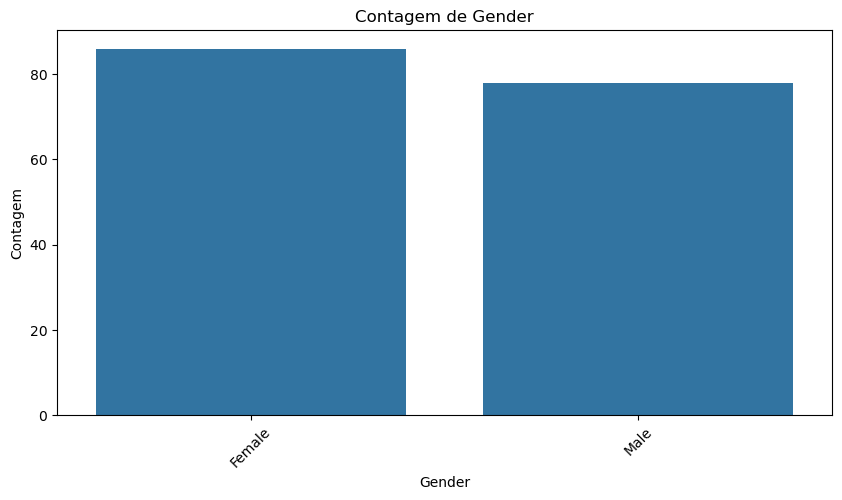

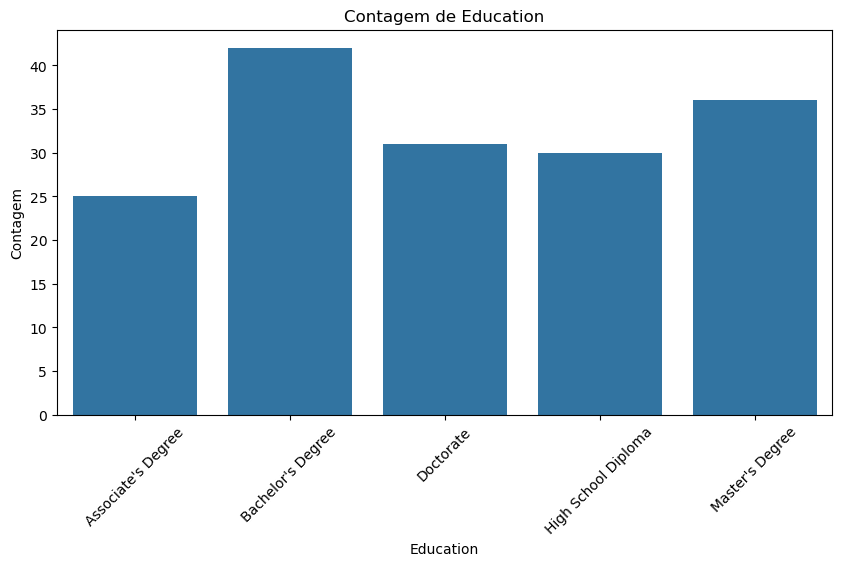

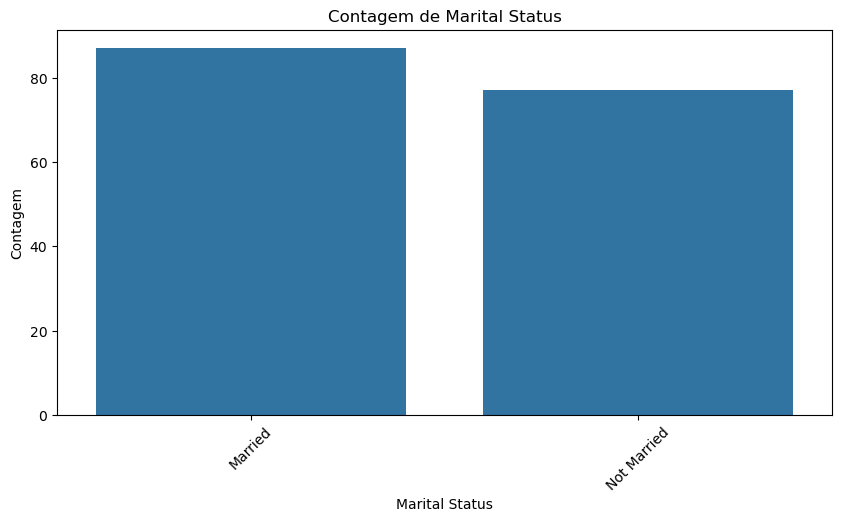

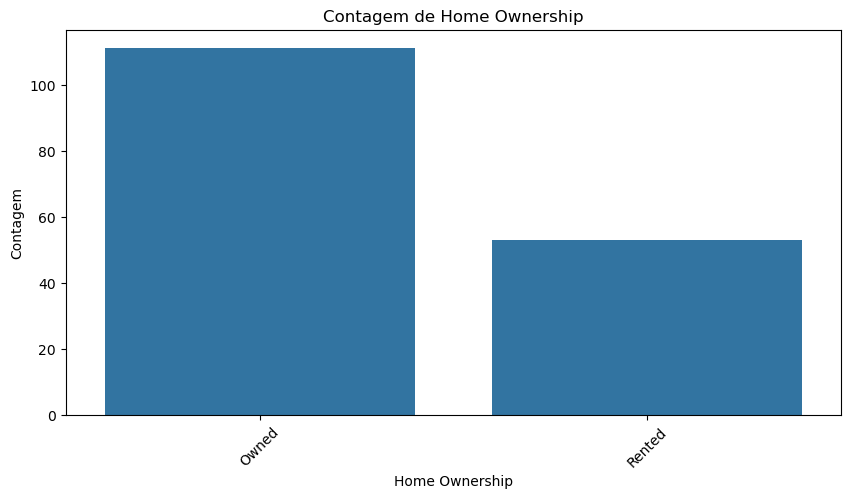

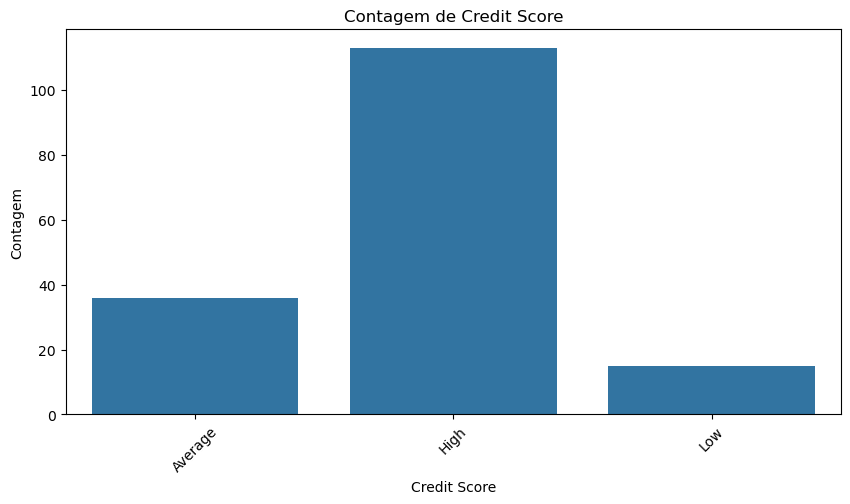

In [126]:
# Plotando gráfico para cada coluna categorica
for col in df.select_dtypes(include=['category']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Contagem de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

In [127]:
# entre as colunas, só se destaca a coluna 'Home Ownership', onde a maioria dos clientes é proprietária de casa, o que é esperado para um dataset de crédito, já que os clientes que possuem casa tendem a ter mais estabilidade financeira e, portanto, são mais propensos a obter crédito.
# Além disso, a coluna 'Credit Score' parece conter muitos outliers, entretanto, devemos considerar que é apenas um desbalancemaneto entre as categorias, já que a maioria dos clientes tem um score entre 600 e 700, o que é esperado para um dataset de crédito, e há um pequena quantidade de clientes com score muito alto, o que está de acordo com a realidade.
df['Credit Score'].value_counts(normalize=True) * 100

Credit Score
High       68.902439
Average    21.951220
Low         9.146341
Name: proportion, dtype: float64

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [128]:
# Não encontrei outliers, apenas desbalanceamento como citado.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [129]:
# A) Criando um gráfico para visualizar a relação entre Idade e Status cívil
fig = px.histogram(df, x='Age', color='Marital Status', title='Relação entre Idade e Status Cívil')
fig.show()
# Analisando o gráfico, podemos observer que os mais jovens tendem a estar solteiros, enquanto os mais velhos tendem a ser casados, o que é esperado para um dataset de crédito, já que os clientes mais jovens tendem a ter menos estabilidade financeira e, portanto, são mais propensos a estar solteiros, enquanto os clientes mais velhos tendem a ter mais estabilidade financeira e, portanto, são mais propensos a ser casados.


In [130]:
# B) Criando um gráfico para visualizar a relação entre credit score e escolaridade
fig = px.histogram(df, x='Credit Score', color='Education', title='Relação entre Credit Score e Escolaridade')
fig.show()

# Analíse da direita para esquerda: Quem tende a ter um score de crédito mais baixo são cleintes que possuem apenas ensino médio, o que é esperado.
# Enquanto isso, pessoas com score de crédito 'Avarage' são pessoas com um nível de escolaridade mais alto, oque também é esperado.
# E por fim, aqueles que possuem um score de crédito 'Good' são pessoas com um nível de escolaridade ainda mais alto, o que também é esperado, já que pessoas com um nível de escolaridade mais alto tendem a ter mais estabilidade financeira e, portanto, são mais propensos a obter um score de crédito mais alto.

In [131]:
# C) Relação entre salário e idade
fig = px.bar(df, x='Age', y='Income', title='Relação entre Idade e Renda')
fig.show()

In [132]:
# Apesar de pessoas com menos de 30 anos receberem uma renda mais baixa, o que é esperado, não há uma relação clara entre idade e renda, já que há pessoas com mais de 30 anos que recebem uma renda mais baixa do que pessoas com menos de 30 anos, o que pode ser explicado por diversos fatores, como nível de escolaridade, experiência profissional, entre outros.

In [133]:
# D) Relação entre scorde de credito e salário
fig = px.bar(df, x='Credit Score', y='Income', title='Relação entre Credit Score e Renda')
fig.show()

In [134]:
# Claramente, é possivel criar uma relação entre score de crédito e renda, já que pessoas com um score de crédito mais alto tendem a ter uma renda mais alta, o que é esperado, já que pessoas com um score de crédito mais alto tendem a ter mais estabilidade financeira e, portanto, são mais propensos a obter uma renda mais alta.

In [135]:
# E) Relação entre moradia e score de crédito
fig = px.histogram(df, x='Credit Score', color='Home Ownership', title='Relação entre Home Ownership e Credit Score')
fig.show()


In [136]:
# Claramente, é possivel notar que pessoas que possuem casa própria tendem a ter um score de crédito mais alto.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [137]:
# 1) Existe uma correlação entre o numero de crinaças e o score de crédito?
fig = px.histogram(df, x='Credit Score', color='Number of Children', title='Relação entre Number of Children e Credit Score')
fig.show()

# É possivel criar uma relação entre essas 2 variaveis, já que, qunato mais filhos, mais renda é nessesário para sustentar a família, o que pode levar a um score de crédito mais alto, como já vimos, a renda inflencia no score.


In [138]:
# 2) Existe uma correlação entre o gênero, salário e o score de crédito?
fig = px.histogram(df, x='Credit Score',y='Income', color='Gender')
fig.show()

# Aqui podemos fazer uma relação intessante. Apesar de pessoas com score de crédito alta ser bem balanceado entre homens e mulheres, pessoas com socore de crédito baixo tendem a ser mulheres.


In [139]:
# 3) Ex

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

    Age  Gender    Income  Education  Marital Status  Number of Children  \
0  25.0       0   50000.0          1               1                   0   
1  30.0       1  100000.0          4               0                   2   
2  35.0       0   75000.0          2               0                   1   
3  40.0       1  125000.0          3               1                   0   
4  45.0       0  100000.0          1               0                   3   

   Home Ownership  Credit Score  
0               1             1  
1               0             1  
2               0             1  
3               0             1  
4               0             1  


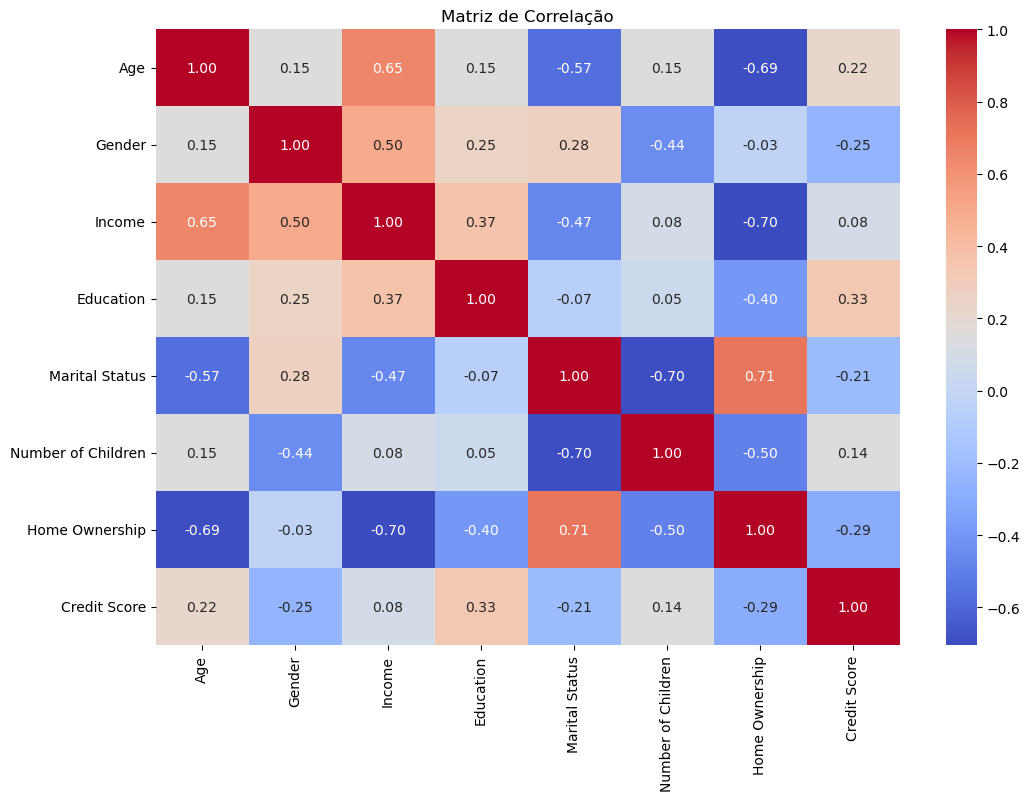

In [140]:
# Utilizaremos o label enconder para transformar as colunas categóricas em numéricas, já que o modelo de machine learning que utilizaremos não aceita dados categóricos.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Vou criar uma nova DF para não alterar o original, já que ainda podemos precisar dele para análises futuras.
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
print(df_encoded.head())

# Agora podemos fazer a correlação entre as variáveis numéricas, já que as colunas categóricas foram transformadas em numéricas.
corr = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [141]:
# Agora podemos tirar muitos insights a partir dessa matriz de correlação, por exemplo, podemos ver que há uma correlação positiva entre idade e score de crédito, como já vimos antes
# Além disso, podemos ver que há uma correlação positiva entre renda e score de crédito, como também vimos antes.
# Outra observação a ser analise é que: Apesar da base de dados estar bem distribuida entre homens e mulheres, há uma correlação negativa entre gênero e score de crédito, o que pode ser explicado pelo fato de que pessoas com score de crédito baixo tendem a ser mulheres, como vimos no gráfico anterior.


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [142]:
# Agora podemos tirar muitos insights a partir dessa matriz de correlação, por exemplo, podemos ver que há uma correlação positiva entre idade e score de crédito, como já vimos antes
# Além disso, podemos ver que há uma correlação positiva entre renda e score de crédito, como também vimos antes.
# Outra observação a ser analise é que: Apesar da base de dados estar bem distribuida entre homens e mulheres, há uma correlação negativa entre gênero e score de crédito, o que pode ser explicado pelo fato de que pessoas com score de crédito baixo tendem a ser mulheres, como vimos no gráfico anterior.

# Todas elas fazem sentido, já que idade, renda e gênero são fatores que podem influenciar o score de crédito de uma pessoa.
# Outrossim, todas as correlações comprovam a análise bivariada que fizemos anteriormente, o que é um bom sinal.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [143]:
# Já feito anterirmente

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [144]:
# Já feito anterirmente

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [145]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Credit Score', axis=1)
y = df_encoded['Credit Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print('X shape:', X.shape)
print('y shape:', y.shape)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X shape: (164, 7)
y shape: (164,)
X_train shape: (131, 7)
X_test shape: (33, 7)
y_train shape: (131,)
y_test shape: (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit Score'>

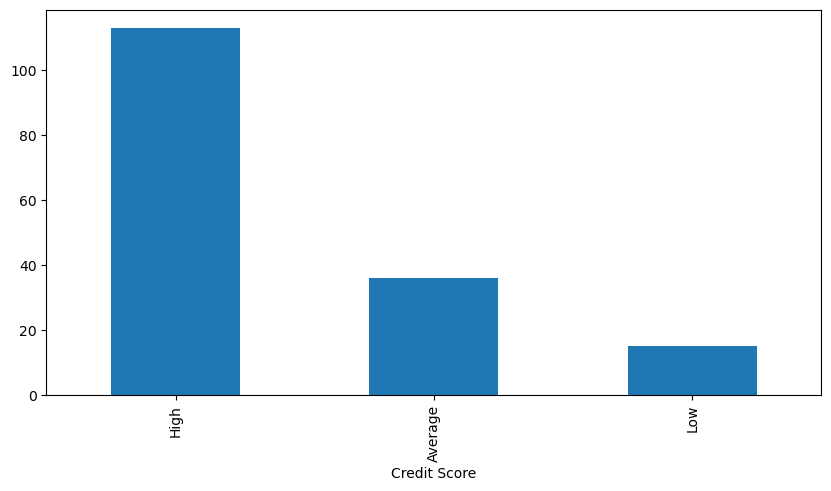

In [146]:
credit_score_counts = df['Credit Score'].value_counts()
plt.figure(figsize=(10, 5)) 
credit_score_counts.plot(kind='bar')

# Não há balanceamento, estamos com uma base de dados desbalanceada, o que pode ser um problema para o modelo de machine learning, já que ele pode acabar aprendendo a classificar apenas a classe majoritária, que nesse caso é o High.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [147]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print(y_train_balanced.value_counts())

Credit Score
1    90
2    90
0    90
Name: count, dtype: int64
